In [1]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
import pandas as pd

df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
df.drop('Cabin', axis = 1, inplace = True)

In [13]:
import numpy as np

mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace = True)

In [17]:
embarked_freq = df['Embarked'].value_counts().idxmax()
df['Embarked'].fillna(embarked_freq, inplace = True)

In [20]:
df.drop(['PassengerId', 'Ticket', 'Name'], axis = 1, inplace = True)

In [22]:
df = pd.get_dummies(df, columns = ['Sex', 'Embarked'], drop_first = True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [23]:
df = df.astype('float')

In [24]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0


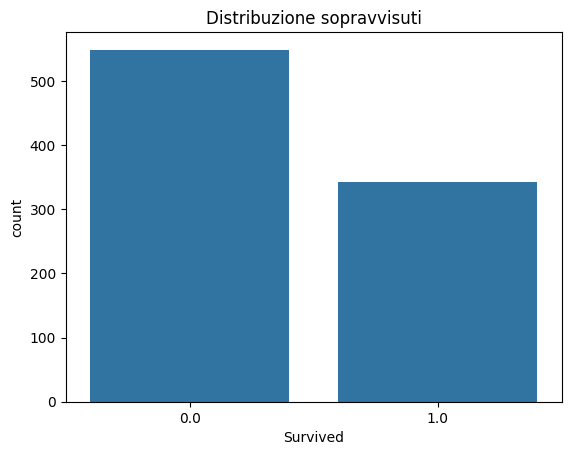

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Survived', data = df)
plt.title('Distribuzione sopravvisuti')
plt.show()

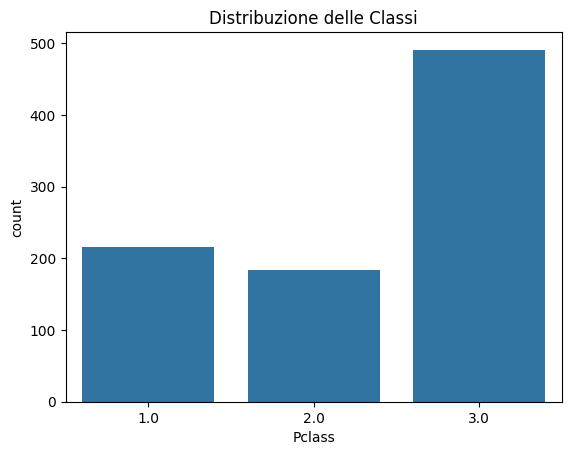

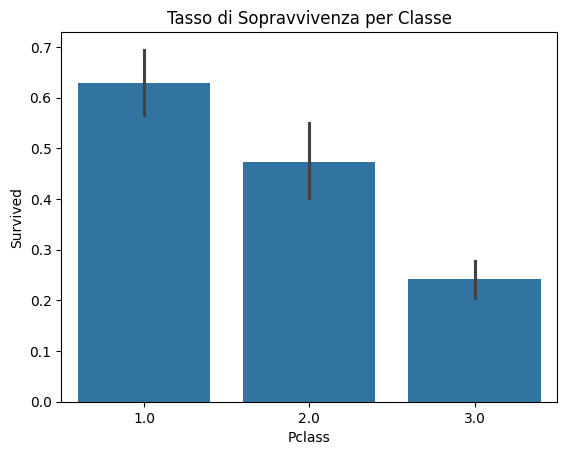

In [36]:
sns.countplot(x='Pclass', data=df)
plt.title('Distribuzione delle Classi')
plt.show()

sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Tasso di Sopravvivenza per Classe')
plt.show()

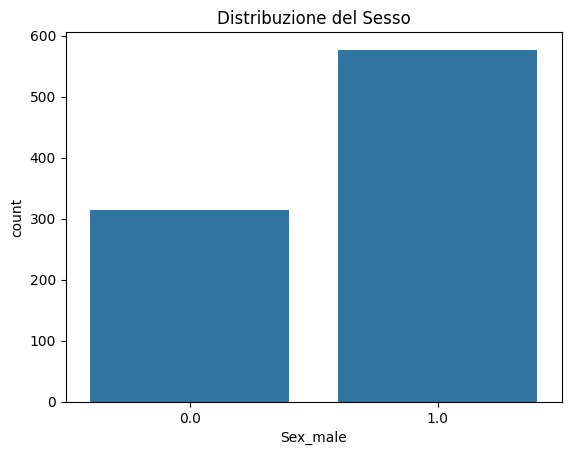

In [40]:
sns.countplot(x='Sex_male', data=df)
plt.title('Distribuzione del Sesso')
plt.show()

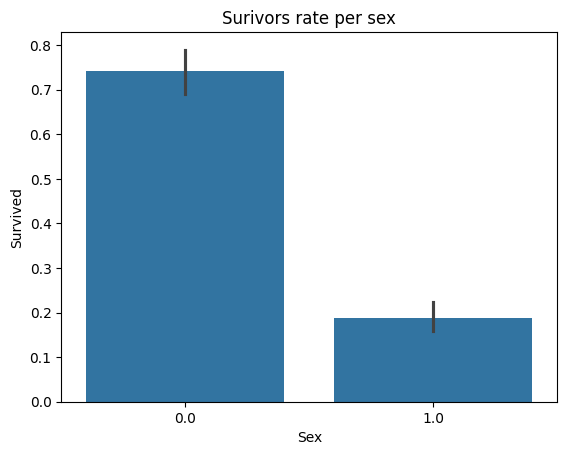

In [41]:
sns.barplot(x='Sex_male', y='Survived', data = df)
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.title('Surivors rate per sex')
plt.show()

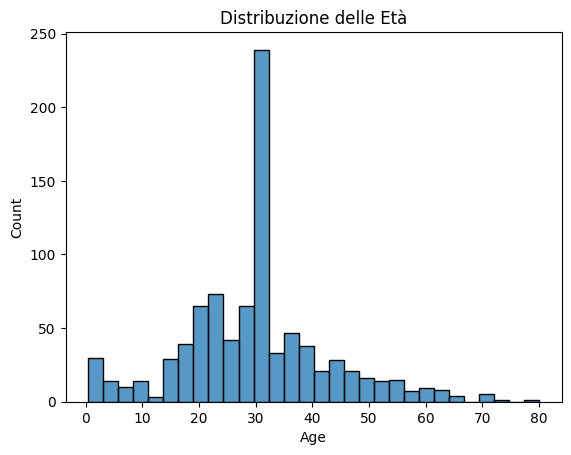

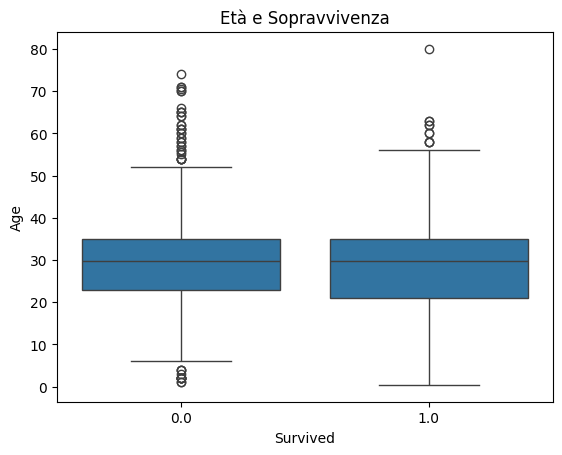

In [42]:
sns.histplot(df['Age'].dropna(), kde=False, bins=30)
plt.title('Distribuzione delle Età')
plt.show()

sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Età e Sopravvivenza')
plt.show()

In [47]:
df.corr()['Survived'].sort_values()

,Survived
Sex_male,-0.543351
Pclass,-0.338481
Embarked_S,-0.149683
Age,-0.069809
SibSp,-0.035322
Embarked_Q,0.003650
Parch,0.081629
Fare,0.257307
Survived,1.000000


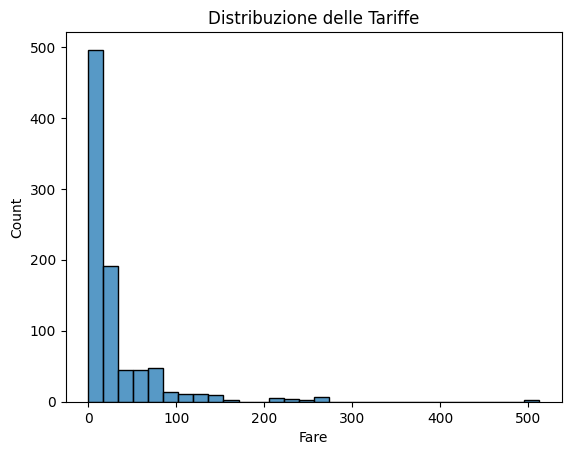

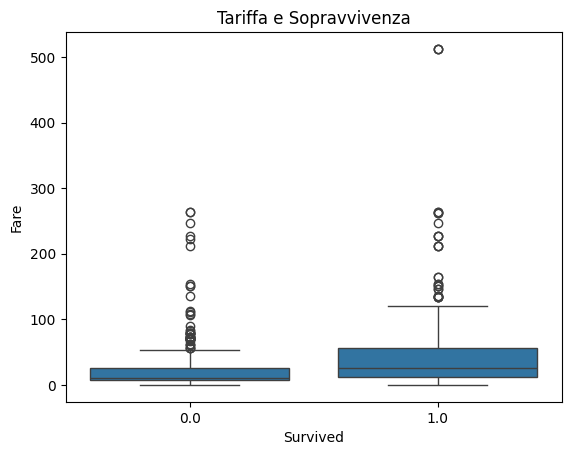

In [48]:
sns.histplot(df['Fare'], kde=False, bins=30)
plt.title('Distribuzione delle Tariffe')
plt.show()

sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Tariffa e Sopravvivenza')
plt.show()

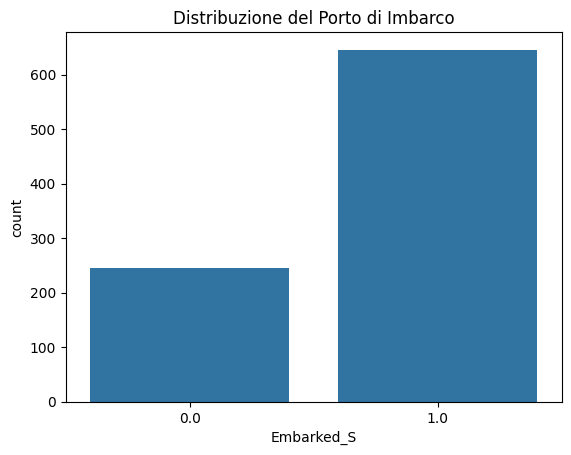

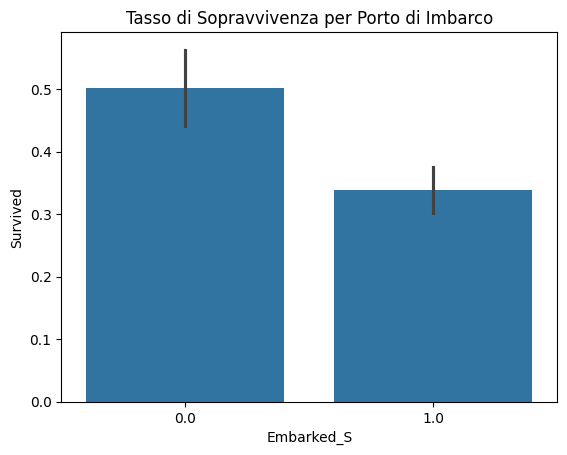

In [49]:
sns.countplot(x='Embarked_S', data=df)
plt.title('Distribuzione del Porto di Imbarco')
plt.show()

sns.barplot(x='Embarked_S', y='Survived', data=df)
plt.title('Tasso di Sopravvivenza per Porto di Imbarco')
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separazione delle feature e della variabile target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Suddivisione del dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Modello di Regressione Logistica
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Previsioni sul test set
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84       105
         1.0       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



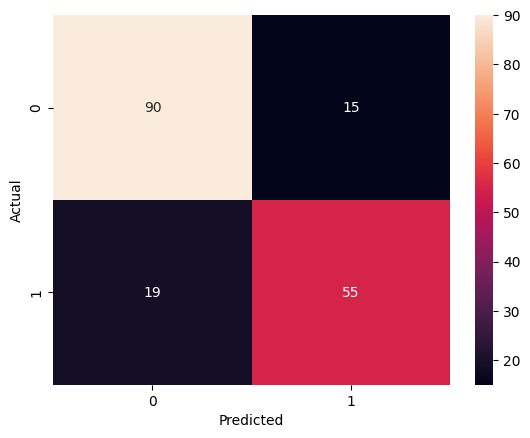

In [53]:
# Accuratezza del modello
print("Accuracy:", accuracy_score(y_test, y_pred))

# Report di classificazione
print(classification_report(y_test, y_pred))

# Matrice di confusione
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()